# Part II - FordGoBike System Dataset Exploration Presentation
## by Adegbite Moriam Adesola

## Investigation Overview
The goal of this presentation is to determine how bike-sharing system was utilized in terms of the user types, member gender and trip duration. 

For the presentation, I'll be focusing on how customers travelled during each day of the week as well as how each gender made use of the bikes during each day of the week.
Therefore, the presentation will start by introducing individual variables of user type, member gender and start day, before going on to combine the variables to see how they relate to each other.

## Dataset Overview
The dataset was provided by Udacity as part of the Data Analyst Nanodegree third project on data visualization. The dataset contains information about individual rides in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# data cleaning
df.dropna(inplace=True)

In [4]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [5]:
df['bike_id'] = df.bike_id.astype(str)

In [6]:
import datetime as dt
df['start_hr'] = df['start_time'].dt.hour
df['start_hr'] = df.start_hr.astype(str)
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()
df['start_year'] = df['start_time'].dt.year
df['start_year'] = df.start_year.astype(str)

df['end_hr'] = df['end_time'].dt.hour
df['end_hr'] = df.end_hr.astype(str)
df['end_day'] = df['end_time'].dt.day_name()
df['end_month'] = df['end_time'].dt.month_name()
df['end_year'] = df['end_time'].dt.year
df['end_year'] = df.end_year.astype(str)

In [7]:
# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [8]:
df.shape

(174952, 24)

## User type

The first visualization shows the user types in the dataset and their frequency. There are more subscribers than customers.

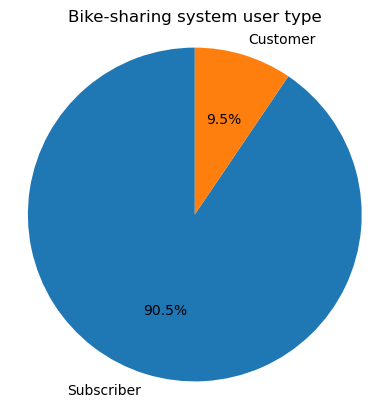

In [9]:
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct = '%1.1f%%')
plt.axis('square')
plt.title('Bike-sharing system user type');

## Member Gender

More males than females is observed by exploring the data.

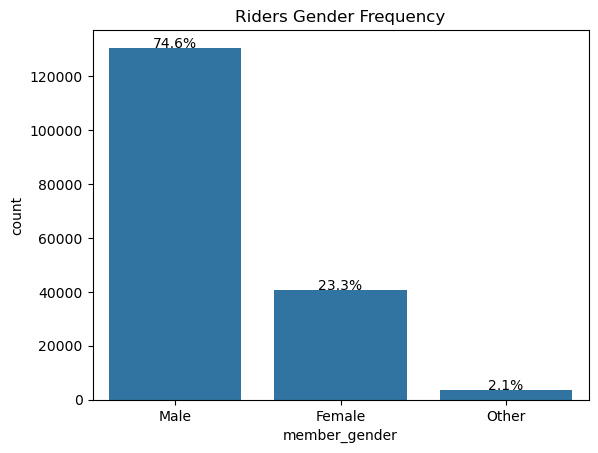

In [10]:
base_color = sb.color_palette()[0]
order = df.member_gender.value_counts().index
ax = sb.countplot(data = df, x = 'member_gender', color = base_color, order = order)
plt.title('Riders Gender Frequency')

total = len(df)
for a in ax.patches:
    percentage = '{:.1f}%'.format(100 * a.get_height()/total)
    x = a.get_x() + a.get_width()/2
    y = a.get_height()+.05
    ax.annotate(percentage, (x, y), ha ='center')
plt.show();

## Start Day

Most trips occured on Thursday. Then Tuesday, Wednesday, Friday and Monday. Saturday and Sunday has the least number of rides.

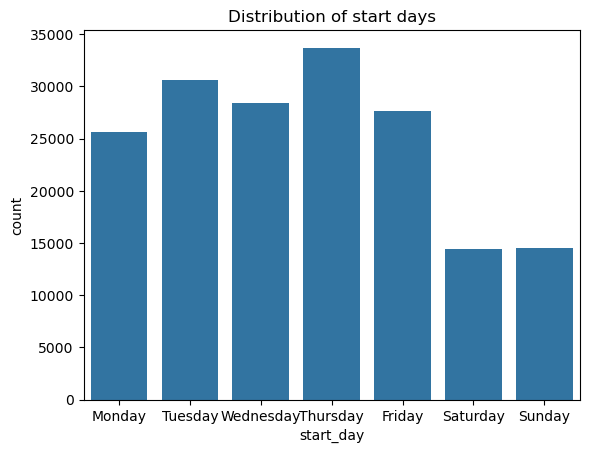

In [11]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_day', color = base_color)
plt.title('Distribution of start days');

## User type and Trip duration

Customers ride for longer duration than subscribers.

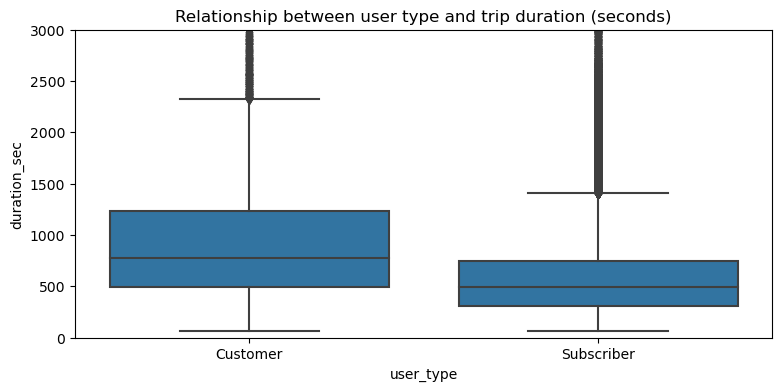

In [12]:
plt.figure(figsize = [9, 4])
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([0, 3000])
plt.title('Relationship between user type and trip duration (seconds)');

## Gender and trip duration

On average, females ride for longer duration that males.

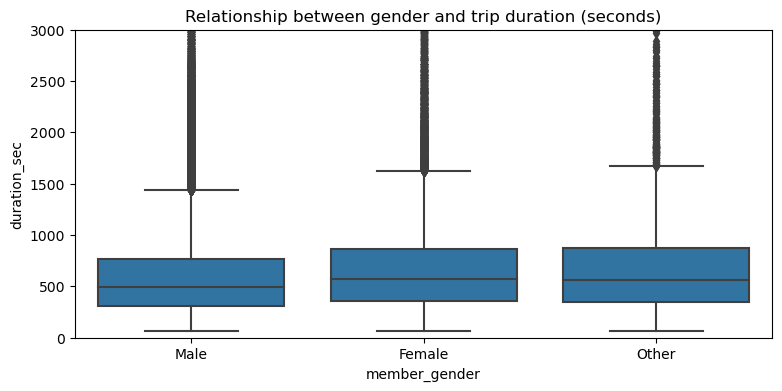

In [13]:
plt.figure(figsize = [9, 4])
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color, order = df.member_gender.value_counts().index)
plt.ylim([0, 3000])
plt.title('Relationship between gender and trip duration (seconds)');

## User type, Start day and trip duration

Customers travel more than subscriber during each day of the week. For each user type, the trip duration is higher on Weekends than on weekdays. However, customers travel for longer periods on Sundays than on Saturdays while it is vice versa for subscribers.

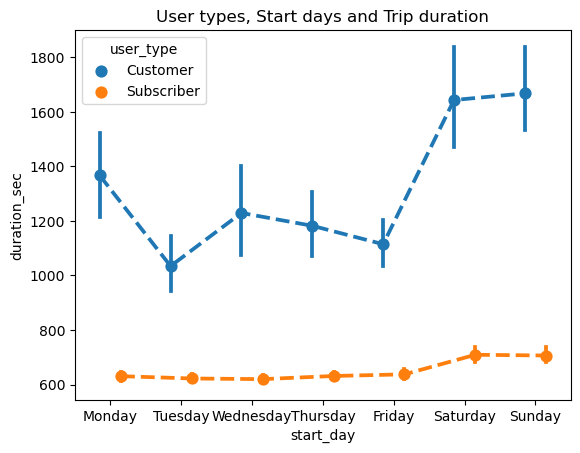

In [14]:
sb.pointplot(data = df, x = 'start_day', y = 'duration_sec', hue = 'user_type', dodge = 0.3, linestyles = "--")
plt.title('User types, Start days and Trip duration');

## Gender, Start day and Trip duration

Females ride for the longest average duration on Sunday and for the least average duration on Tuesday. The 'other' gender also ride more than the males on each day of the week.

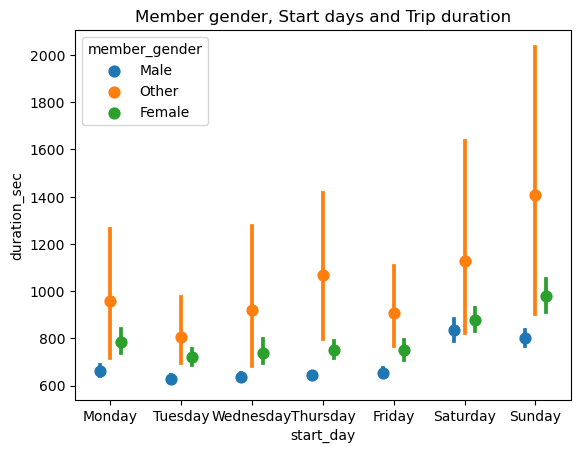

In [15]:
sb.pointplot(data = df, x = 'start_day', y = 'duration_sec', hue = 'member_gender', dodge = 0.3, linestyles = " ")
plt.title('Member gender, Start days and Trip duration');

## Generate slideshow

In [ ]:
!jupyter nbconvert fordgobikepartII.ipynb --to slides --post serve --no-input --no-prompt